# The Wavefunction Collapse Algorithm
----

The Wavefunction Collapse Algorithm (WFC) is a procedural generation algorithm that generates images by collapsing a wavefunction. It's inspired by the process of quantum measurement, where a quantum system transitions from a superposition of states to a single state.

Here's a high-level overview of the algorithm:

1. **Initialization**: Start with a grid of cells, each in a superposition of all possible states (e.g., different types of tiles in a tileset).

2. **Observation**: Choose a cell using some heuristic (e.g., the cell with the smallest entropy), and collapse it into a single state, chosen randomly according to the weights of its superposition.

3. **Propagation**: Update the superpositions of all neighboring cells to remove states that are no longer compatible with the collapsed cell. This is typically done using a predefined set of constraints (e.g., certain tiles can only be placed next to certain other tiles).

4. **Repeat**: Continue with the observation and propagation steps until all cells have been collapsed.

The algorithm can be represented mathematically as follows:

Let $S = \{s_1, s_2, ..., s_n\}$ be the set of all possible states. Each cell $c$ in the grid has a superposition $P_c = \{p_{c1}, p_{c2}, ..., p_{cn}\}$, where $p_{ci}$ is the weight of state $s_i$ at cell $c$.

The observation step can be represented as:

$s_c = \text{random}(S, P_c)$

where $\text{random}(S, P_c)$ is a function that chooses a state from $S$ randomly according to the weights $P_c$, and $s_c$ is the observed state of cell $c$.

The propagation step can be represented as:

$P_{c'} = P_{c'} \cap \text{compatible}(s_c)$

for all neighboring cells $c'$ of $c$, where $\text{compatible}(s_c)$ is a function that returns the set of states compatible with $s_c$.

This process continues until all cells have been observed, resulting in a fully generated image. The algorithm can generate a wide variety of images depending on the initial set of states and compatibility rules. It's a powerful tool for procedural generation in game development and other fields.

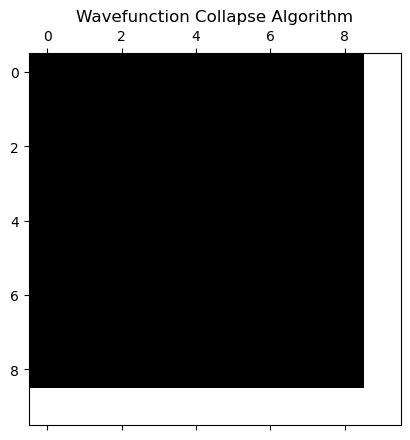

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Parameters
grid_size = 10
pattern_size = 3

# Generate random binary pattern
pattern = np.random.choice([0, 1], size=(pattern_size, pattern_size))

# Initialize grid with superposition
grid = np.ones((grid_size, grid_size)) * -1

# Collapse function
def collapse(grid, x, y, pattern):
    size = pattern.shape[0]
    grid[x:x+size, y:y+size] = pattern

# Main simulation loop
for i in range(grid_size - pattern_size + 1):
    for j in range(grid_size - pattern_size + 1):
        # Check if the pattern fits
        if np.all(grid[i:i+pattern_size, j:j+pattern_size] == -1):
            collapse(grid, i, j, pattern)

# Plotting
cmap = ListedColormap(['white', 'black'])
plt.matshow(grid, cmap=cmap)
plt.title('Wavefunction Collapse Algorithm')
plt.show()
